In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
ls

GANs_MNIST.ipynb  MNIST_data/  out/


In [2]:
cd /content/gdrive/My Drive/Colab Notebooks/GANs/Week1

/content/gdrive/My Drive/Colab Notebooks/GANs/Week1


In [14]:
pwd

'/content/gdrive/My Drive/Colab Notebooks/GANs/Week1'

In [4]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
from tensorflow.python.framework import ops
from keras.preprocessing import image
from matplotlib.pyplot import imshow

In [ ]:
# Discriminator Net, hidden layer nodes = 128
tf.reset_default_graph()
X = tf.placeholder(tf.float32, shape=[784, None])

D_W1 = tf.get_variable('D_W1', [128, 784], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
D_b1 = tf.get_variable('D_b1', [128, 1], initializer = tf.zeros_initializer())

D_W2 = tf.get_variable('D_W2', [1, 128], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
D_b2 = tf.get_variable('D_b2', [1, 1], initializer = tf.zeros_initializer())

theta_D = [D_W1, D_W2, D_b1, D_b2]

# Generator Net, hidden layer nodes = 128
Z = tf.placeholder(tf.float32, shape=[100, None])

G_W1 = tf.get_variable('G_W1', [128, 100], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
G_b1 = tf.get_variable('G_b1', [128, 1], initializer = tf.zeros_initializer())

G_W2 = tf.get_variable('G_W2', [784, 128], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
G_b2 = tf.get_variable('G_b2', [784, 1], initializer = tf.zeros_initializer())

theta_G = [G_W1, G_W2, G_b1, G_b2]


In [8]:
#Test script
with tf.Session() as sess:
    print(D_W1)
    print(D_b1)
    print(D_W2)
    print(D_b2)
    print(G_W1)  
    print(G_b1)
    print(G_W2)
    print(G_b2)
    print(X)
    print(Z)
    

<tf.Variable 'D_W1:0' shape=(128, 784) dtype=float32_ref>
<tf.Variable 'D_b1:0' shape=(128, 1) dtype=float32_ref>
<tf.Variable 'D_W2:0' shape=(1, 128) dtype=float32_ref>
<tf.Variable 'D_b2:0' shape=(1, 1) dtype=float32_ref>
<tf.Variable 'G_W1:0' shape=(128, 100) dtype=float32_ref>
<tf.Variable 'G_b1:0' shape=(128, 1) dtype=float32_ref>
<tf.Variable 'G_W2:0' shape=(784, 128) dtype=float32_ref>
<tf.Variable 'G_b2:0' shape=(784, 1) dtype=float32_ref>
Tensor("Placeholder:0", shape=(784, ?), dtype=float32)
Tensor("Placeholder_1:0", shape=(100, ?), dtype=float32)


In [ ]:
# Define random inputs for Generator
def sample_Z(m, n):
    return np.random.uniform(-1., 1., size=[m, n])

In [ ]:
def generator(z):
    G_h1 = tf.nn.relu(tf.matmul(G_W1, z) + G_b1)
    G_log_prob = tf.matmul(G_W2, G_h1) + G_b2
    G_prob = tf.nn.sigmoid(G_log_prob)

    return G_prob

In [11]:
# test script
tf.reset_default_graph()

with tf.Session() as sess:
    print(generator(Z))

Tensor("Sigmoid:0", shape=(784, ?), dtype=float32)


In [ ]:
def discriminator(x):
    D_h1 = tf.nn.relu(tf.matmul(D_W1, x) + D_b1)
    D_logit = tf.matmul(D_W2, D_h1) + D_b2
    D_prob = tf.nn.sigmoid(D_logit)

    return D_prob, D_logit

In [13]:
# test script
tf.reset_default_graph()

with tf.Session() as sess:
    print(discriminator(X))

(<tf.Tensor 'Sigmoid_1:0' shape=(1, ?) dtype=float32>, <tf.Tensor 'add_3:0' shape=(1, ?) dtype=float32>)


In [ ]:
def plot(samples):
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)
    
    samples = np.transpose(samples)
    
    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')

    return fig

In [ ]:
G_sample = generator(Z)
D_real, D_logit_real = discriminator(X)
D_fake, D_logit_fake = discriminator(G_sample)

# we use negative sign for the loss functions because they need to be maximized
# whereas TensorFlow’s optimizer can only do minimization.
# D_loss = -tf.reduce_mean(tf.log(D_real) + tf.log(1. - D_fake))
# G_loss = -tf.reduce_mean(tf.log(D_fake))

# Alternative losses:
# -------------------
D_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_real, labels=tf.ones_like(D_logit_real)))
D_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_fake, labels=tf.zeros_like(D_logit_fake)))
D_loss = D_loss_real + D_loss_fake
G_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_fake, labels=tf.ones_like(D_logit_fake)))

D_solver = tf.train.AdamOptimizer().minimize(D_loss, var_list=theta_D)
G_solver = tf.train.AdamOptimizer().minimize(G_loss, var_list=theta_G)

In [22]:
mb_size = 128
Z_dim = 100

mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    if not os.path.exists('out/'):
        os.makedirs('out/')

    i = 0

    D_cost = []
    G_cost =[]

    for it in range(200000):
        if it % 1000 == 0:
            samples = sess.run(G_sample, feed_dict={Z: sample_Z(Z_dim, 16)})

            fig = plot(samples)
            plt.savefig('out/{}.png'.format(str(i).zfill(3)), bbox_inches='tight')
            i += 1
            plt.close(fig)

        X_mb, _ = mnist.train.next_batch(mb_size)
        X_mb = np.transpose(X_mb)

        _, D_loss_curr = sess.run([D_solver, D_loss], feed_dict={X: X_mb, Z: sample_Z(Z_dim, mb_size)})
        _, G_loss_curr = sess.run([G_solver, G_loss], feed_dict={Z: sample_Z(Z_dim, mb_size)})


        if it % 1000 == 0:
            print('Iter: {}'.format(it))
            print('D loss: {:.4}'. format(D_loss_curr))
            print('G_loss: {:.4}'.format(G_loss_curr))
            print()
        if it % 500 == 0:
            D_cost.append(D_loss_curr)
            G_cost.append(G_loss_curr)          
        
# plt.figure(figsize=[14,6])
# plt.subplot(1,2,1)
# plt.plot(np.squeeze(D_cost))
# plt.ylabel('cost')
# plt.xlabel('iterations')
# plt.title("Discriminator D(x) Cost")

# plt.subplot(1,2,2)
# plt.plot(np.squeeze(G_cost))
# plt.ylabel('cost')
# plt.xlabel('iterations')
# plt.title("Generator G(z) Cost")
# plt.subplots_adjust(wspace=0.3);

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Iter: 0
D loss: 1.834
G_loss: 1.953

Iter: 1000
D loss: 0.008935
G_loss: 7.506

Iter: 2000
D loss: 0.03069
G_loss: 5.008

Iter: 3000
D loss: 0.08072
G_loss: 4.748

Iter: 4000
D loss: 0.2825
G_loss: 5.414

Iter: 5000
D loss: 0.3193
G_loss: 4.359

Iter: 6000
D loss: 0.3598
G_loss: 4.094

Iter: 7000
D loss: 0.4316
G_loss: 3.683

Iter: 8000
D loss: 0.5199
G_loss: 2.731

Iter: 9000
D loss: 0.6143
G_loss: 2.916

Iter: 10000
D loss: 0.5512
G_loss: 2.516

Iter: 11000
D loss: 0.6446
G_loss: 2.393

Iter: 12000
D loss: 0.7011
G_loss: 2.63

Iter: 13000
D loss: 0.871
G_loss: 1.91

Iter: 14000
D loss: 0.8063
G_loss: 1.81

Iter: 15000
D loss: 0.9967
G_loss: 1.862

Iter: 16000
D loss: 0.6662
G_loss: 2.003

Iter: 17000
D loss: 1.086
G_loss: 1.901

Iter: 18000
D loss: 0.5543
G_loss: 2.011

Iter: 19000
D loss: 0.8

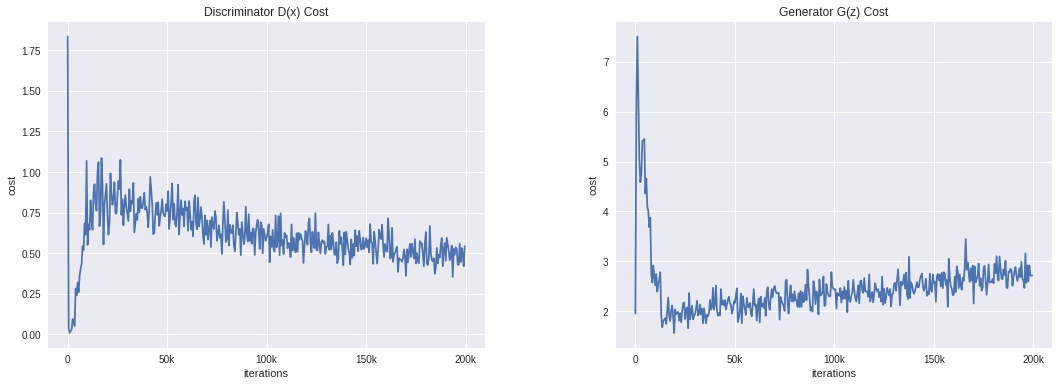

In [32]:
plt.figure(figsize=[18,6])
plt.subplot(1,2,1)
plt.plot(np.squeeze(D_cost))
plt.ylabel('cost')
plt.xlabel('iterations')
plt.xticks([0, 100, 200, 300, 400], [0, "50k", "100k", "150k", "200k"])
plt.title("Discriminator D(x) Cost")

plt.subplot(1,2,2)
plt.plot(np.squeeze(G_cost))
plt.ylabel('cost')
plt.xlabel('iterations')
plt.xticks([0, 100, 200, 300, 400], [0, "50k", "100k", "150k", "200k"])
plt.title("Generator G(z) Cost")
plt.subplots_adjust(wspace=0.3);

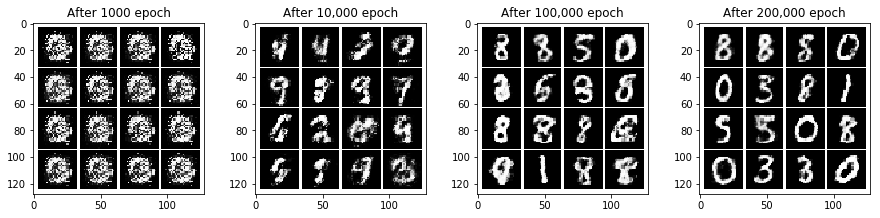

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
image_path = 'out/001.png'
img = image.load_img(image_path, target_size=(128, 128))
imshow(img);
plt.title("After 1000 epoch");

plt.subplot(1,4,2)
image_path = 'out/010.png'
img = image.load_img(image_path, target_size=(128, 128))
imshow(img);
plt.title("After 10,000 epoch");

plt.subplot(1,4,3)
image_path = 'out/100.png'
img = image.load_img(image_path, target_size=(128, 128))
imshow(img);
plt.title("After 100,000 epoch");

plt.subplot(1,4,4)
image_path = 'out/200.png'
img = image.load_img(image_path, target_size=(128, 128))
imshow(img);
plt.title("After 200,000 epoch");

plt.subplots_adjust(wspace=0.3);